<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
pandas</p>

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [1]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to Pandas Data Structures: Series</p>
<br>
<b>pandas</b> has two main data structures<br>
<ul>
    <li><b>Series</b></li>
    <li>DataFrames</li>
</ul>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"> Series </p>

In [2]:
pandas_series = pd.Series(data=[100, 200, 300, 400, 500], index=['tom', 'bob', 'nancy', 'dan', 'eric'])

#no need for data and index
#pandas_series = pd.Series([100, 200, 300, 400, 500], ['tom', 'bob', 'nancy', 'dan', 'eric'])

#heterogenousdata types
#pandas_series = pd.Series([100, 'foo', 300, "bar", 500], index=['tom', 'bob', 'nancy', 'dan', 'eric'])

In [3]:
pandas_series

tom      100
bob      200
nancy    300
dan      400
eric     500
dtype: int64

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"> Accessing Data</p>

In [4]:
pandas_series.index

#pandas_series['nancy']
#pandas_series.loc['nancy']
pandas_series.loc[['nancy','bob']]

nancy    300
bob      200
dtype: int64

In [5]:
## Elements can also be selected using their index location.
pandas_series[[4, 3, 1]]
## This retrieves the elements at the selected rows. Row numbers from 0

#index location
#pandas_series.iloc[2]
pandas_series.iloc[[2,4]]

nancy    300
eric     500
dtype: int64

In [6]:
'bob' in pandas_series

True

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"> Operations on Series </p>

In [7]:
pandas_series * 2
pandas_series[['nancy','bob']] * 2

nancy    600
bob      400
dtype: int64

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"> Hands On: Series </p>
Create a new series object with the squares of each element.

In [8]:

## recall that ** perform exponential calculations

squares = pandas_series ** 2
## recall that ** perform exponential calculations
print(squares)

tom       10000
bob       40000
nancy     90000
dan      160000
eric     250000
dtype: int64


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to Pandas Data Structures: DataFrames</p>
<br>
<b>pandas</b> has two main data structures
<ul>
    <li>Series</li>
    <li><b>DataFrames</b></li>
</ul>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"> DataFrames </p> <br/>
<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Creating a DataFrame</p>

In [9]:
df = pd.DataFrame(columns=['A','B','C','D','E','F','G'])
# creates an empty dataframe with the columns specified
df

,A,B,C,D,E,F,G


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Saving/ Loading a DataFrame to a pickle</p>

In [10]:
df = pd.DataFrame(columns=['A','B','C','D','E','F','G'])
df.to_pickle("empty_dataframe.pickle")
del df # we delete the dataframe after saving to the pickle file
#df

'df' variable no longer stores the dataframe. We now load the dataframe back into df

In [11]:
df = pd.read_pickle('empty_dataframe.pickle')
df

,A,B,C,D,E,F,G


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Creating a DataFrame from numpy array</p>

In [12]:
import numpy as np

In [13]:
np_array = np.random.randint(1,11,size=(10, 4)) 
# this creates a 10 x 4 numpy array of random integers sampled from [1,11)
print(np_array)
df = pd.DataFrame(np_array, columns=['A', 'B', 'C', 'D']) # the 4 columns in the numpy array are now the 4 columns of the pandas dataframe
df

[[ 4  2  3 10]
 [ 4 10  3  1]
 [ 9  1  1  4]
 [ 7  7  7  4]
 [ 3  7  2  8]
 [ 2  4  5  2]
 [ 3  3  9  9]
 [ 6  2  5  6]
 [ 8  8  3  2]
 [ 8  3  7  5]]


,A,B,C,D
0,4,2,3,10
1,4,10,3,1
2,9,1,1,4
3,7,7,7,4
4,3,7,2,8
5,2,4,5,2
6,3,3,9,9
7,6,2,5,6
8,8,8,3,2
9,8,3,7,5


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [14]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]
#data = [{'alex': 1, 'joe': 2}]

In [15]:
pd.DataFrame(data)

,alex,joe,ema,dora,alice
0,1.0,2.0,NaN,NaN,NaN
1,NaN,NaN,5.0,10.0,20.0


In [16]:
pd.DataFrame(data, index=['orange', 'red'])

,alex,joe,ema,dora,alice
orange,1.0,2.0,NaN,NaN,NaN
red,NaN,NaN,5.0,10.0,20.0


In [17]:
pd.DataFrame(data, columns=['joe', 'dora','alice'])

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Creating DataFrame from dictionary of Python Series</p>

In [18]:
dict1 = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}
print(dict1)

{'one': apple    100.0
ball     200.0
clock    300.0
dtype: float64, 'two': apple      111.0
ball       222.0
cerill     333.0
dancy     4444.0
dtype: float64}


In [19]:
df = pd.DataFrame(dict1)
df
#print(df)

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Accessing Data </p>

In [20]:
pd.DataFrame(dict1, index=['dancy', 'ball', 'apple']) # retrieving rows using thier index / key

,one,two
dancy,NaN,4444.0
ball,200.0,222.0
apple,100.0,111.0


In [21]:
df = pd.DataFrame(dict1, index=['dancy', 'ball', 'apple'], columns=['two', 'five']) 
# we can also restrain the number of columns we retrieve
df

,two,five
dancy,4444.0,NaN
ball,222.0,NaN
apple,111.0,NaN


In [22]:
df.index

Index(['dancy', 'ball', 'apple'], dtype='object')

In [23]:
df.columns

Index(['two', 'five'], dtype='object')

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [24]:
df = pd.DataFrame(dict1)
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [25]:
df['one']

apple     100.0
ball      200.0
cerill      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Working with Columns in DataFrames</p>

In [26]:
df['three'] = df['one'] * df['two']
df

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,4444.0,NaN


In [27]:
df['flag'] = df['one'] > 250 
# creating a new column which is True for rows with 'one' value greater than 250
df

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,4444.0,NaN,False


In [28]:
three = df.pop('three') 
# removes a column from the dataframe and saves to 'three' variable
df

,one,two,flag
apple,100.0,111.0,False
ball,200.0,222.0,False
cerill,NaN,333.0,False
clock,300.0,NaN,True
dancy,NaN,4444.0,False


In [29]:
three

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64

In [30]:
df

,one,two,flag
apple,100.0,111.0,False
ball,200.0,222.0,False
cerill,NaN,333.0,False
clock,300.0,NaN,True
dancy,NaN,4444.0,False


In [31]:
del df['two'] # another way to drop or delete a column

In [32]:
df

,one,flag
apple,100.0,False
ball,200.0,False
cerill,NaN,False
clock,300.0,True
dancy,NaN,False


In [33]:
#df.insert(2, 'copy_of_one', df['one']) 
# creates a column called 'copy_of_one' from values of the series df['one'] at position 2
df

,one,flag
apple,100.0,False
ball,200.0,False
cerill,NaN,False
clock,300.0,True
dancy,NaN,False


In [34]:
df['one_upper_half'] = df['one'][:2]
# we create a new column with only two elements, the rest of the rows will recieve a NaN value
df

,one,flag,one_upper_half
apple,100.0,False,100.0
ball,200.0,False,200.0
cerill,NaN,False,NaN
clock,300.0,True,NaN
dancy,NaN,False,NaN


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. Please note that it is already available in the files for Day 2 so you don't need to download the dataset, but here are the links to the data source and location. 
<ul>
    <li>Data Source: MovieLens web site (filename: ml-20m.zip)</li>
    <li>Location: https://grouplens.org/datasets/movielens/</li>
</ul>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Objective</p> <br/>
We seek to draw inferences from this dataset, whilst exploring some of the functionalities pandas has to offer.

Let us look at the files in this dataset using the UNIX command ls.

In [35]:
# Note: Adjust the name of the folder to match your local directory
!ls ./movielens
!cat ./movielens/movies.csv | wc -l
!head -5 ./movielens/movies.csv

Icon?               genome-tags.csv     ratings.csv
README.txt          links.csv           ratings_reduced.csv
genome-scores.csv   movies.csv          tags.csv
   27279
movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
<ul>
    <li>ratings.csv</li>*userId*,*movieId*,*rating*, *timestamp*
    <li>tags.csv</li>*userId*,*movieId*, *tag*, *timestamp*
    <li>movies.csv</li>*movieId*, *title*, *genres* <br>
</ul>

Using the *read_csv* function in pandas, we will ingest these three files.

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">Loading the datasets </p>

In [36]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [37]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [38]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [39]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

## <h1 style="font-size:2em;color:#2467C0">Analyzing the DataFrames </h1><br>

<h1 style="font-size:1.5em;color:#2467C0">Working with Dataframe Rows</h1>

In [40]:
#Extract 0th row: notice that it is infact a Series

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [41]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


<h1 style="font-size:1.5em;color:#2467C0">Working with Dataframe Rows (cont.)</h1>

In [42]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [43]:
row_0['userId']

18

In [44]:
tags[tags.userId == 18]

,userId,movieId,tag
0,18,4141,Mark Waters


<h1 style="font-size:1.5em;color:#2467C0">Working with Dataframe Rows (cont.)</h1>

In [45]:
'rating' in row_0 #checking for the existence of a column in a row

False

In [46]:
row_0.name # prints the index name of the row

0

In [47]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

In [48]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [51]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [52]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
2000,910,68554,conspiracy theory


In [53]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

## <h1 style="font-size:2em;color:#2467C0">Statistics: Let us look how the ratings are distributed </h1><br><br><br><br><br>

<h1 style="font-size:1.5em;color:#2467C0"> Statistics of the ratings<h1>

In [54]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

<h1 style="font-size:1.5em;color:#2467C0"> Statistics of the ratings<h1>

In [55]:
ratings['rating'].mean()

3.5255285642993797

In [56]:
ratings['rating'].min()

0.5

In [57]:
ratings['rating'].max()

5.0

In [58]:
ratings['rating'].std() # standard deviation

1.051988919275684

In [59]:
ratings['rating'].mode()

0    4.0
dtype: float64

### Hands-on Exercise 1: Find most frequently reviewed movie
Print the id of the movie with the most ratings<br>
<b>Bonus:</b> Print the title of this movie

In [60]:
# TODO

mode = ratings['movieId'].mode()[0]
movies[movies.movieId == mode]

#ratings['rating'].describe()

,movieId,title,genres
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


### Hands-on Exercise 2: Find the Mean Rating of a Movie¶
The movie Toy Story has movieId 1. Find out the mean rating for Toy Story. For this exercise you just need to use the ratings DataFrame:

In [61]:
# TODO
toy_story_rating = ratings[ratings.movieId == 1].rating.mean()
#assert abs(toy_story_rating - 3.92) < 0.01, "Try again, select only the rows where the movieId is equal to 1"

In [62]:
assert abs(toy_story_rating - 3.92) < 0.01, "Try again, select only the rows where the movieId is equal to 1"

<h1 style="font-size:1.5em;color:#2467C0"> Filtering a Column</h1>

In [63]:
filter_1 = ratings['rating'] > 5
filter_1.any()

False

In [64]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

## <h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1><br>

<h1 style="font-size:1.5em;color:#2467C0"> Missing Values <h1>

In [63]:
movies.shape

(27278, 3)

In [64]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

No NULL values exist

In [65]:
ratings.shape

(20000263, 3)

In [66]:
#is any row NULL ?

ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

No NULL values exist

In [67]:
tags.shape

(465564, 3)

In [68]:
#is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

We have some tags which are NULL.

In [69]:
tags = tags.dropna()

In [70]:
#Checking again if any row is NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [71]:
tags.shape

(465548, 3)

Notice the number of rows have reduced from 465564 to 465548

### Hands-on Exercise 3: Filter by Genre
Let's implement a general function that filters movies by genres:

In [72]:
def filter_by_genre(input_movies, genre):
    """Return only movies of a specific genre"""
    # TODO
    return input_movies[input_movies.genres.str.contains(genre)]

Then let's apply it to the dataset to retain only the "Fantasy" movies:

In [73]:
fantasy_movies = filter_by_genre(movies, "Fantasy")
assert len(movies) == 27278, "Try again, check the documentation of the function you used"

## <h1 style="font-size:2em;color:#2467C0">Visualizing the Data - Ratings</h1><br>

<h1 style="font-size:1.5em;color:#2467C0"> Histograms </h1>

A histogram is a plot of the underlying frequency distribution (shape) of a set of continuous data. 
This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc. 
An example of a histogram, and the raw data it was constructed from, is shown below:

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

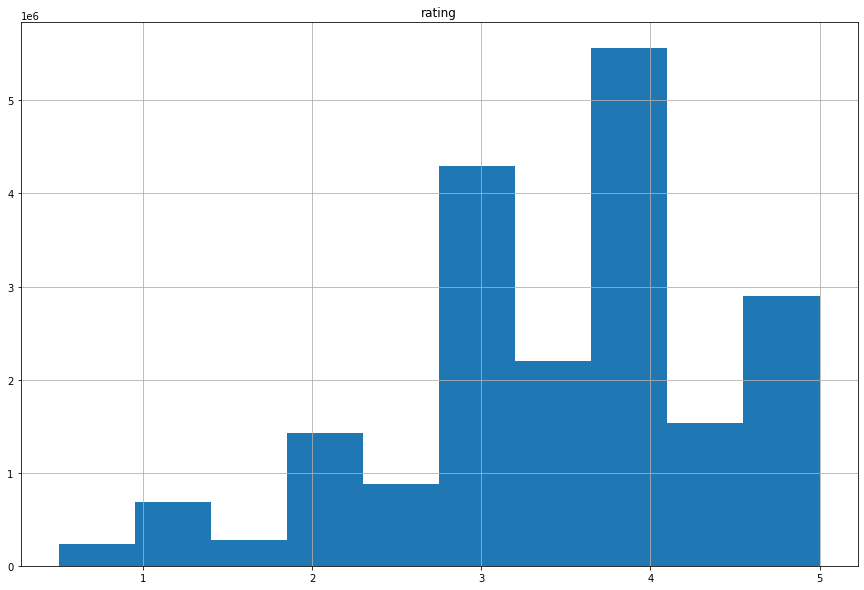

In [74]:
%matplotlib inline 
# this enables the plots to display in your Jupyter notebook

ratings.hist(column='rating', figsize=(15,10))

<i>source : https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review</i>

<AxesSubplot:>

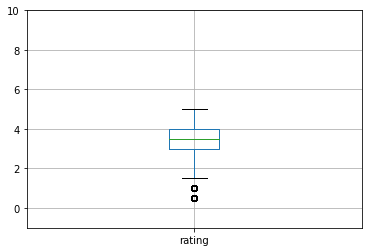

In [75]:
#Adjust y-axis label to go from -1 to 10
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_ylim((-1, 10))

#Plot using Pandas boxplot() function
ratings.boxplot(column='rating', figsize=(15,20))

<h1 style="font-size:2em;color:#2467C0">Slicing out columns</h1>
 

In [76]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [77]:
movies[['title','genres']].head() #recall that this is a way to select multiple columns from the dataframe

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


<h1 style="font-size:1.5em;color:#2467C0"> Slicing (contd.)</h1>

In [78]:
ratings[1000:1010] #this selects the rows 1000 through 1009 from the ratings dataframe

,userId,movieId,rating
1000,11,527,4.5
1001,11,531,4.5
1002,11,541,4.5
1003,11,546,5.0
1004,11,551,5.0
1005,11,586,4.0
1006,11,587,4.5
1007,11,588,5.0
1008,11,589,4.5
1009,11,592,4.5


In [79]:
tag_counts = tags['tag'].value_counts()
tag_counts[:10]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64

<h1 style="font-size:1.5em;color:#2467C0"> Slicing (contd.)</h1>

<AxesSubplot:>

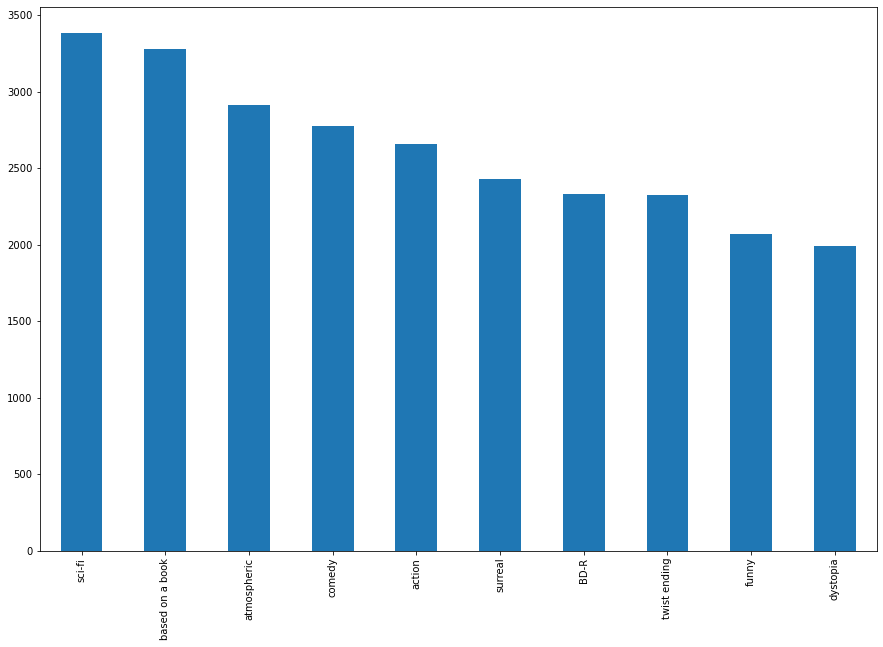

In [80]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">Filters for selecting rows</h1>


In [81]:
is_highly_rated = ratings['rating'] >= 4.0 # selects rows with ratings of 4.0 and better

ratings[is_highly_rated][-5:] # retrieves the last 5 rows which satisfy the condition

,userId,movieId,rating
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000261,138493,70286,5.0


In [82]:
is_animation = movies['genres'].str.contains('Animation') # we create a condition on each row that is true only if the movie has a 'Animation' genre

movies[is_animation][-5:]  # retrieves the last 5 rows which satisfy the condition

,movieId,title,genres
27241,131132,Kleines Arschloch - Der Film (1997),Animation|Comedy
27247,131144,Werner - Das muss kesseln!!! (1996),Animation|Comedy
27248,131146,Werner - Volles Rooäää (1999),Animation|Comedy
27269,131243,Werner - Gekotzt wird später (2003),Animation|Comedy
27270,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy


<h1 style="font-size:1.5em;color:#2467C0">Groupby/Aggregate </h1>

In [83]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
# groupby : groups rows by thier rating values
# count : returns the number of elements in each group
# These are similar to the SQL functions presented earlier in this course
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [84]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
# this fetches the mean of the ratings for each movie
average_rating.tail()

,rating
movieId,
131254,4.0
131256,4.0
131258,2.5
131260,3.0
131262,4.0


<h1 style="font-size:1.5em;color:#2467C0">Groupby/Aggregate </h1>

In [85]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
# this retrieves the number of ratings for each movie
movie_count.tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1


<h1 style="font-size:1.5em;color:#2467C0">Merging Dataframes</h1>


In [86]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [87]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<h1 style="font-size:1.5em;color:#2467C0">Merging Dataframes (contd.)</h1>


We now merge the tags and movies dataframes into a dataframe 't'.<br>
This is similar to the SQL "JOIN" covered earlier in this course.

In [88]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

## Exercise 4: Join Movies and Ratings

Let's create a single `DataFrame` that contains both titles and mean ratings of the popular fantasy movies.

Titles are only available in the `movies` `DataFrame`, while ratings in the `ratings` `DataFrame`, we would like to create a single DataFrame that includes Title.

In [89]:
mean_ratings = None #TODO
mean_ratings = ratings.rating.groupby(ratings.movieId).mean()

In this case we don't even need to use a join operation, we can just create a new column in the `fantasy_movies` DataFrame. This will automatically match the index of `mean_ratings` with the index of `fantasy_movies` and attach to each movie its rating. Ratings for movies that are not in the `fantasy_movies` DataFrame are discarded.

The recommended way of creating columns in the recent versions of `pandas` is through the `assign` function, read its documentation!

In [90]:
fantasy_movies.assign?

Signature: fantasy_movies.assign(**kwargs) -> 'DataFrame'
Docstring:
Assign new columns to a DataFrame.

Returns a new object with all original columns in addition to new ones.
Existing columns that are re-assigned will be overwritten.

Parameters
----------
**kwargs : dict of {str: callable or Series}
    The column names are keywords. If the values are
    callable, they are computed on the DataFrame and
    assigned to the new columns. The callable must not
    change input DataFrame (though pandas doesn't check it).
    If the values are not callable, (e.g. a Series, scalar, or array),
    they are simply assigned.

Returns
-------
DataFrame
    A new DataFrame with the new columns in addition to
    all the existing columns.

Notes
-----
Assigning multiple columns within the same ``assign`` is possible.
Later items in '\*\*kwargs' may refer to newly created or modified
columns in 'df'; items are computed and assigned into 'df' in order.

.. versionchanged:: 0.23.0

   Keyword argu

In [91]:
fantasy_movies_with_ratings = fantasy_movies.assign(rating = mean_ratings)


In [92]:
fantasy_movies_with_ratings.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.921240
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,4.057546
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy,3.468456
55,56,Kids of the Round Table (1995),Adventure|Children|Fantasy,3.241214


In [93]:
diff = fantasy_movies_with_ratings[fantasy_movies_with_ratings.movieId == 2].rating - 3.92
assert abs(diff.item()) < 0.01 , "Try again, missing or wrong rating"

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Other Analytics : Combine aggregation, merging, and filters to get useful analytics
</p>

In [ ]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean() # this gives the avg rating for each movie from the ratings dataframe
del avg_ratings['userId'] # the avg is per movie, so we drop the 'userId' from the avg_ratings dataframe 
avg_ratings.head()

We now merge the movies and the avg_ratings dataframes on the "movieId" column. We call this new dataframe "box_office"

In [ ]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

<h1 style="font-size:1.5em;color:#2467C0"> Other Analytics (contd.) </h1>

In [ ]:
is_highly_rated = box_office['rating'] >= 4.0 # this is similar to what we did a couple of code blocks ago
# but now we have the movie names as well, so we can make inferences

box_office[is_highly_rated][-5:]

In [ ]:
# Now lets try retreiving the Comedy movies 
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

<h1 style="font-size:1.5em;color:#2467C0"> Other Analytics (contd.) </h1>

### Figuring out the Comedy Movies that were box office hits is now a one-liner

In [ ]:
box_office[is_comedy & is_highly_rated][-5:]

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Working withh 'genre' :  we can split 'genres' into multiple columns

<br> </p>

In [ ]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [ ]:
movie_genres[:10]

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">
You can also add a new column to detect each genre: e.g. isComedy <br>
This will be handy when creating features in your Machine Learning course </p>

In [ ]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [ ]:
movie_genres[:10]

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title e.g. (1995)

<br> </p>

In [ ]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [ ]:
movies.tail()

## <h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1>


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Timestamps are common in sensor data or other time series datasets <br><br>
Let us revisit the tags.csv dataset and read the timestamps !
</p>

In [ ]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')

In [ ]:
tags.dtypes

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [ ]:
tags.head(5)

Lets make those timestamps into something more readable

In [ ]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

In [ ]:
tags.head(2)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [ ]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [ ]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

## <h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over time<br> - Are Movie ratings related to the year of launch somehow? </h1>

In [ ]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
# we again find the average rating per movie
average_rating.tail()

In [ ]:
joined = movies.merge(average_rating, on='movieId', how='inner')
# we merge the movies and the average ratings into "joined"
joined.head()

In [ ]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
# this gives us the mean rating of all the movies in each year and save it into yearly_average dataframe
yearly_average[:10]

In [ ]:
#lets plot this yearly_avg
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Do some years look better for the boxoffice movies than others? <br><br>

Does any data point seem like an outlier in some sense?

</p>

# Solutions to Hands On Exercises:

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"> Hands On: Series </p>
Create a new series object with the squares of each element.

In [78]:
squares = pandas_series ** 2
## recall that ** perform exponential calculations
print(squares)

tom       10000
bob       40000
nancy     90000
dan      160000
eric     250000
dtype: int64


### Hands-on Exercise 1: Find most frequently reviewed movie
Print the id of the movie with the most ratings<br>
<b>Bonus:</b> Print the title of this movie

In [ ]:
mode = ratings['movieId'].mode()[0]
movies[movies.movieId == mode]

### Hands-on Exercise 2: Find the Mean Rating of a Movie¶
The movie Toy Story has movieId 1. Find out the mean rating for Toy Story. For this exercise you just need to use the ratings DataFrame:

In [ ]:
toy_story_rating = ratings[ratings.movieId == 1].rating.mean()
assert abs(toy_story_rating - 3.92) < 0.01, "Try again, select only the rows where the movieId is equal to 1"

### Hands-on Exercise 3: Filter by Genre
Let's implement a general function that filters movies by genres:

In [ ]:
def filter_by_genre(input_movies, genre):
    """Return only movies of a specific genre"""
    return input_movies[input_movies.genres.str.contains(genre)]

fantasy_movies = filter_by_genre(movies, "Fantasy")
assert len(movies) == 27278, "Try again, check the documentation of the function you used"

## Exercise 4: Join Movies and Ratings

Let's create a single `DataFrame` that contains both titles and mean ratings of the popular fantasy movies.

Titles are only available in the `movies` `DataFrame`, while ratings in the `ratings` `DataFrame`, we would like to create a single DataFrame that includes Title.

In [ ]:
mean_ratings = ratings.rating.groupby(ratings.movieId).mean()